# **Week 1**


## Libraries

**Pandas :** Providing, fast, flexible data structures. It's good to use for doing data analysis. Example: DataFrame, Time Series

**Numpy : ** Linear Algebra, Random Numbers

**Matplotlib**, **Statsmodels ** 

In [ ]:
##importing data from CSV File

#libraries
import pandas as pd


"""
  Since the new pandas version 0.21.0 we use pd.read_csv instead of from_csv method
"""
fb = pd.read_csv("/data/FB.csv")
print(type(fb)) ##Pandas/DataFrame

<class 'pandas.core.frame.DataFrame'>


###Basics of DataFrame

In [ ]:
fb.head() #first 6 rows with all columns
fb["Date"][0:10] #first teen rows of Date column
fb.columns # return columns
fb.shape #number of rows and columns 2015x7 matrix
    #rows = observations, columns = variables


#methods of dataframe

fb.tail() #last 5 row
fb.describe() #summarizing the measures such as std, mean, min, q1,q2,q3 value and max


#slicing dataframe
fb.loc[0, 'Close'] #index, label - 0.index's column value
fb.iloc[1,3] #selecting by index it starts with zero so 1th row 3th column
fb.iloc[0:5, 0:-1] ##multible
fb.iloc[612: , : ] #all columns and all the rows beginning from 612
fb[["Open", "Close"]] ##multi columns and all rows

,Open,Close
0,21.240000,21.170000
1,20.850000,20.469999
2,20.520000,19.990000
3,19.959999,19.209999
4,19.150000,20.070000
...,...,...
2010,274.500000,263.109985
2011,264.600006,261.359985
2012,263.160004,265.299988
2013,281.000000,287.380005


####***Visualizing Stock Price using Pandas*** 

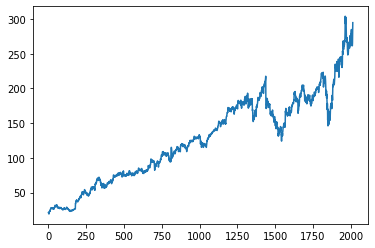

In [ ]:
#we don't always need matplotlib. there's some plotting method within  pandas
fb.iloc[:,  5].plot()

###Generating new Variables in DataFrame


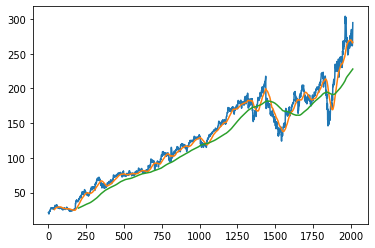

In [ ]:
fb["Price1"] = fb["Close"].shift(-1)
#shifts a whole column upwards by one row
fb["PriceDiff"] = fb["Price1"]- fb["Close"] #close price of tomorrow - close price of today
fb["DailyReturn"] = fb["PriceDiff"]/fb["Close"]
fb["Direction"] = [1 if fb.loc[ei, "PriceDiff"] > 0 else -1
                   for ei in fb.index]

fb["Average3"] = (fb["Close"] + fb["Close"].shift(1) + fb["Close"].shift(2))/3



fb["MA40"] = fb["Close"].rolling(40).mean() #Moving Average over 40 days
fb["MA200"] = fb["Close"].rolling(200).mean() #Moving Average over 200 days


#plot moving areage
fb["Close"].plot()
fb["MA40"].plot()
fb["MA200"].plot()

# IF MA40> MA200 - Trend-Following : Stock Price will be higher

In [ ]:
fb.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Price1,PriceDiff,DailyReturn,Direction,Average3,MA40,MA200
2010,2020-10-30,274.500000,276.700012,259.100006,263.109985,263.109985,47247800,261.359985,-1.750000,-0.006651,-1,270.536662,266.092751,226.759901
2011,2020-11-02,264.600006,270.470001,257.339996,261.359985,261.359985,27165700,265.299988,3.940003,0.015075,1,268.433319,265.558500,226.956001
2012,2020-11-03,263.160004,270.049988,260.880005,265.299988,265.299988,17961900,287.380005,22.080017,0.083227,1,263.256653,265.412000,227.175301
2013,2020-11-04,281.000000,288.940002,278.619995,287.380005,287.380005,35364400,294.679993,7.299988,0.025402,1,271.346659,265.753500,227.505600
2014,2020-11-05,291.899994,297.380005,288.950012,294.679993,294.679993,23780800,NaN,NaN,NaN,-1,282.453329,266.418250,227.880200


###Building a Trading Strategy

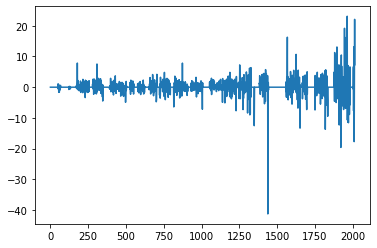

In [ ]:
## Short-Term Moving Average : Fast Signal | Long-Term MA : Slow Signal
## if MA 10 > MA 50 -> BUY AND HOLD ONE
## if MA 10 < MA 50 -> SOLD AND DON'T HOLD ANY

fb["MA10"] = fb["Close"].rolling(10).mean() #Moving Average over 40 days
fb["MA50"] = fb["Close"].rolling(50).mean() #Moving Average over 40 days
fb["Shares"] = [1 if fb.loc[ei, "MA10"] > ms.loc[ei, "MA50"] else 0
                for ei in ms.index]

fb.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Price1,PriceDiff,DailyReturn,Direction,Average3,MA40,MA200,MA10,MA50,Shares,Close1,Profit,wealth
0,2012-11-06,21.240000,21.370001,20.990000,21.170000,21.170000,29062700,20.469999,-0.700001,-0.033066,-1,NaN,NaN,NaN,NaN,NaN,0,20.469999,0.000000,0.000000
1,2012-11-07,20.850000,20.950001,20.370001,20.469999,20.469999,33396800,19.990000,-0.479999,-0.023449,-1,NaN,NaN,NaN,NaN,NaN,0,19.990000,0.000000,0.000000
2,2012-11-08,20.520000,20.730000,19.980000,19.990000,19.990000,34254600,19.209999,-0.780001,-0.039020,-1,20.543333,NaN,NaN,NaN,NaN,0,19.209999,0.000000,0.000000
3,2012-11-09,19.959999,20.000000,19.129999,19.209999,19.209999,42295500,20.070000,0.860001,0.044768,1,19.889999,NaN,NaN,NaN,NaN,0,20.070000,0.000000,0.000000
4,2012-11-12,19.150000,20.170000,18.870001,20.070000,20.070000,67349200,19.860001,-0.209999,-0.010463,-1,19.756666,NaN,NaN,NaN,NaN,0,19.860001,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010,2020-10-30,274.500000,276.700012,259.100006,263.109985,263.109985,47247800,261.359985,-1.750000,-0.006651,-1,270.536662,266.092751,226.759901,274.260999,270.719602,1,261.359985,-1.750000,126.259998
2011,2020-11-02,264.600006,270.470001,257.339996,261.359985,261.359985,27165700,265.299988,3.940003,0.015075,1,268.433319,265.558500,226.956001,274.256998,270.606601,1,265.299988,3.940003,130.200001
2012,2020-11-03,263.160004,270.049988,260.880005,265.299988,265.299988,17961900,287.380005,22.080017,0.083227,1,263.256653,265.412000,227.175301,274.030997,270.484801,1,287.380005,22.080017,152.280018
2013,2020-11-04,281.000000,288.940002,278.619995,287.380005,287.380005,35364400,294.679993,7.299988,0.025402,1,271.346659,265.753500,227.505600,274.895996,270.616001,1,294.679993,7.299988,159.580006
